In [414]:
import random
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [415]:
p = [1000, 2000, 1500, 2500, 300]   # potenciales clientes por anuncio
q = [65, 90, 40, 60, 20]            # valoraciones mínimas
c = [160, 300, 40, 100, 10]         # costos unitarios correspondientes
max_ads = [15, 10, 25, 4, 30]

In [416]:
domains = {i: list(range(max_ads[i] + 1)) for i in range(5)}
domains

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 2: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 3: [0, 1, 2, 3, 4],
 4: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [417]:
def cons_tv(x1, x2):   return c[0]*x1 + c[1]*x2 <= 3800
def cons_dr(x3, x4):   return c[2]*x3 + c[3]*x4 <= 2800
def cons_d_r(x3, x5):  return c[2]*x3 + c[4]*x5 <= 3500

def Z1(x):  return sum(p[i]*q[i]*x[i] for i in range(5))
def Z2(x):  return sum(c[i]*x[i] for i in range(5))

In [418]:
#Función que revisa el domino de las variables del arco consistencia 
def revise(dom, i, j, cn):
    revised = False
    for xi in dom[i][:]:
        if not any(cn(xi, xj) for xj in dom[j]):
            dom[i].remove(xi)
            revised = True
    return revised

In [419]:
#Función AC3
def ac3(dom, arcs):
    queue = deque(arcs)
    while queue:
        i, j, cn = queue.popleft()
        if revise(dom, i, j, cn):
            for a, b, cfunc in arcs:
                if b == i and a != j:
                    queue.append((a, b, cfunc))
    return dom

In [420]:
#Función para frontera de pareto
def dominates_dir(a, b, directions):
    """
    a, b: tuplas (x_int, z1, z2)
    directions: lista ['max'|'min', 'max'|'min']
    """
    za, zb = [a[1], a[2]], [b[1], b[2]]
    # Debe ser al menos tan bueno en todos y mejor en uno
    all_good = all((d=='max' and za[i] >= zb[i]) or (d=='min' and za[i] <= zb[i])
                   for i, d in enumerate(directions))
    strict   = any((d=='max' and za[i] > zb[i])  or (d=='min' and za[i] < zb[i])
                   for i, d in enumerate(directions))
    return all_good and strict

In [421]:
def pareto_front(sols, directions):
    """Devuelve la lista de soluciones no dominadas según 'directions'."""
    front = []
    for s in sols:
        if not any(dominates_dir(o, s, directions) for o in sols if o!=s):
            front.append(s)
    return front


In [422]:
def dominates(a, b):
    """¿a = (x_a, Z1_a, Z2_a) domina a b = (x_b, Z1_b, Z2_b)?"""
    Za1, Za2 = a[1], a[2]
    Zb1, Zb2 = b[1], b[2]
    return (Za1 >= Zb1 and Za2 <= Zb2) and (Za1 > Zb1 or Za2 < Zb2)

In [423]:
arcos = [
    (0,1,cons_tv), (1,0,lambda x2,x1: cons_tv(x1,x2)),
    (2,3,lambda x3,x4: cons_dr(x3,x4)), (3,2,lambda x4,x3: cons_dr(x3,x4)),
    (2,4,lambda x3,x5: cons_d_r(x3,x5)), (4,2,lambda x5,x3: cons_d_r(x3,x5)),
]

In [424]:
pruned = ac3({i: domains[i].copy() for i in domains}, arcos)

In [425]:
N, T = 50, 100
all_solutions = []   # acumularemos (x_int, Z1, Z2)
pop = [[random.uniform(0, max_ads[i]) for i in range(5)] for _ in range(N)]
pop

[[12.253404013761243,
  7.923366964196933,
  17.97354991818758,
  0.9858851136737288,
  23.612979265170193],
 [11.908610315626957,
  2.1299330919416946,
  9.994624909834252,
  1.7890064452479297,
  18.131782235109892],
 [8.66430488079628,
  5.953350105096019,
  15.312226776513537,
  0.5573003980110824,
  26.454130387018772],
 [6.048006741008784,
  5.796181352115587,
  3.096524518868815,
  0.0740997083095496,
  15.975827233887303],
 [14.759868261248657,
  8.790056756891897,
  20.478457045830044,
  0.6097626914393137,
  19.06003700967313],
 [10.348547222245871,
  3.37526602774184,
  12.674692577642663,
  1.5897269158949277,
  8.692296659352682],
 [14.343016797884722,
  7.645157159047892,
  17.162663937424448,
  2.7718768246975083,
  14.366680531482633],
 [6.016658955104964,
  4.58289666008813,
  4.384353684757289,
  3.1353961131027637,
  4.264452614075669],
 [9.124087249204468,
  2.7155417270779503,
  0.937763921580248,
  2.181966181932473,
  1.8363615393914223],
 [6.402714053091078,
  7

In [426]:
def record_solution(x_int):
    z1, z2 = Z1(x_int), Z2(x_int)
    tup = (tuple(x_int), z1, z2)
    all_solutions.append(tup)

In [427]:
def discretize(ind):
    """Convierte solución real a entera redondeando."""
    return [int(round(val)) for val in ind]

In [428]:
#Penalización cuando no se cumplen las restricciones (algoritmo monoobjetivo).
def penalty(x):
    """Penaliza violaciones de presupuesto."""
    pen = 0
    if c[0]*x[0] + c[1]*x[1] > 3800:
        pen += (c[0]*x[0] + c[1]*x[1] - 3800)
    if c[2]*x[2] + c[3]*x[3] > 2800:
        pen += (c[2]*x[2] + c[3]*x[3] - 2800)
    if c[2]*x[2] + c[4]*x[4] > 3500:
        pen += (c[2]*x[2] + c[4]*x[4] - 3500)
    return pen * 100  # factor de penalización

In [429]:
def objective(x):
    """Calidad ponderada a maximizar."""
    return sum(p[i] * q[i] * x[i] for i in range(5))

In [430]:
#Resultado
def fitness(x):
    """Función de fitness combinando objetivo y penalización."""
    return objective(x) - penalty(x)

In [431]:
#Se guarda la población de soluciones iniciales factibles
for ind in pop:
    x_int = [int(round(v)) for v in ind]
    if cons_tv(x_int[0],x_int[1]) and cons_dr(x_int[2],x_int[3]) and cons_d_r(x_int[2],x_int[4]):
        record_solution(x_int)

In [432]:
#Se evaluan todas las soluciónes y se define al lider inicial 
pop_eval = [(fitness(discretize(ind)), ind) for ind in pop]
best_eval, leader = max(pop_eval, key=lambda t: t[0])
print(f"Mejor solución inicial: {leader} con fitness {best_eval}")

Mejor solución inicial: [4.017380642563676, 9.644838576831233, 24.071528266954527, 3.4303663739465797, 19.823853111151365] con fitness 4070000


In [433]:
best_z1_history = []
best_z2_history = []
for t in range(1, T+1):
    new_pop = []
    for ind in pop:
        leader = random.choice(all_solutions)[0]
        if random.random() < 0.5:
            new = [ ind[i] + random.random()*(leader[i]-ind[i])*random.randint(1,2) for i in range(5) ]
        else:
            factor = 1 - t/ T
            new = [ ind[i] + random.random()*(leader[i]-ind[i])*factor for i in range(5) ]
        new = [ max(0, min(max_ads[i], v)) for i, v in enumerate(new) ]
        new_pop.append(new)
    # evaluamos y grabamos factibles
    for ind in new_pop:
        x_int = [int(round(v)) for v in ind]
        if cons_tv(x_int[0],x_int[1]) and cons_dr(x_int[2],x_int[3]) and cons_d_r(x_int[2],x_int[4]):
            record_solution(x_int)
    pop = new_pop
    pop_eval = [(fitness(discretize(ind)), ind) for ind in pop]
    current_best_eval, current_best = max(pop_eval, key=lambda t: t[0])
    if current_best_eval > best_eval:
        best_eval, best = current_best_eval, current_best
    current_best_z1 = max(sol[1] for sol in all_solutions)
    current_best_z2 = min(sol[2] for sol in all_solutions)
    best_z1_history.append(current_best_z1)
    best_z2_history.append(current_best_z2)

In [434]:
front_maxmin = pareto_front(all_solutions, ['max','min'])

front_minmax = pareto_front(all_solutions, ['min','max'])

In [435]:
df_mm = pd.DataFrame([(z1,z2) for _,z1,z2 in front_maxmin], columns=['Z1','Z2'])
df_mn = pd.DataFrame([(z1,z2) for _,z1,z2 in front_minmax], columns=['Z1','Z2'])

In [436]:
print(df_mm.describe()[['Z1','Z2']])
print(df_mn.describe()[['Z1','Z2']])

                 Z1           Z2
count  3.200000e+01    32.000000
mean   2.533750e+06  2850.312500
std    9.514434e+05  1308.765694
min    6.360000e+05   670.000000
25%    1.821000e+06  1962.500000
50%    2.443000e+06  2690.000000
75%    3.370500e+06  4007.500000
max    4.094000e+06  5050.000000
                 Z1           Z2
count  4.500000e+01    45.000000
mean   2.269467e+06  3642.444444
std    8.353685e+05  1060.855477
min    6.360000e+05   670.000000
25%    1.777000e+06  3110.000000
50%    2.267000e+06  3820.000000
75%    2.862000e+06  4490.000000
max    4.070000e+06  5100.000000


In [437]:
mm_sorted = df_mm.sort_values('Z1').reset_index(drop=True)
mm_sorted

,Z1,Z2
0,636000,670
1,1176000,880
2,1229000,1020
3,1306000,1200
4,1540000,1290
5,1542000,1610
6,1581000,1620
7,1722000,1730
8,1854000,2040
9,1932000,2060


In [438]:
# Resultado final
best_int = discretize(leader)
print("\nSolución encontrada:")
print(f" x = {best_int}")
print(f" Calidad total = {objective(best_int)}")
print(f" Costos -> TV: {c[0]*best_int[0] + c[1]*best_int[1]}, "
      f"Diario–Revista: {c[2]*best_int[2] + c[3]*best_int[3]}, "
      f"Diario–Radio: {c[2]*best_int[2] + c[4]*best_int[4]}")


Solución encontrada:
 x = [4, 4, 13, 2, 13]
 Calidad total = 2138000
 Costos -> TV: 1840, Diario–Revista: 720, Diario–Radio: 650


In [439]:
ideal_z1 = mm_sorted['Z1'].max()
ideal_z2 = mm_sorted['Z2'].min()

In [440]:
distances = np.sqrt((mm_sorted['Z1'] - ideal_z1)**2 + (mm_sorted['Z2'] - ideal_z2)**2)
best_idx  = distances.idxmin()
best_z1   = mm_sorted.loc[best_idx, 'Z1']
best_z2   = mm_sorted.loc[best_idx, 'Z2']
distances

0     3.458000e+06
1     2.918000e+06
2     2.865000e+06
3     2.788000e+06
4     2.554000e+06
5     2.552000e+06
6     2.513000e+06
7     2.372000e+06
8     2.240000e+06
9     2.162000e+06
10    2.156000e+06
11    2.126000e+06
12    2.030001e+06
13    1.886001e+06
14    1.826001e+06
15    1.666001e+06
16    1.636001e+06
17    1.421002e+06
18    1.204002e+06
19    1.088003e+06
20    9.540037e+05
21    8.670056e+05
22    8.530061e+05
23    7.340074e+05
24    6.920088e+05
25    6.860089e+05
26    5.420114e+05
27    4.230167e+05
28    3.240268e+05
29    3.030288e+05
30    8.909952e+04
31    4.380000e+03
dtype: float64

In [441]:
plt.figure(figsize=(8,6))


mn_sorted = df_mn.sort_values('Z1').reset_index(drop=True)
x_common = np.linspace(
    max(mm_sorted['Z1'].min(), mn_sorted['Z1'].min()),
    min(mm_sorted['Z1'].max(), mn_sorted['Z1'].max()),
    200
)

<Figure size 800x600 with 0 Axes>

In [442]:
y_mm = np.interp(x_common, mm_sorted['Z1'], mm_sorted['Z2'])
y_mn = np.interp(x_common, mn_sorted['Z1'], mn_sorted['Z2'])

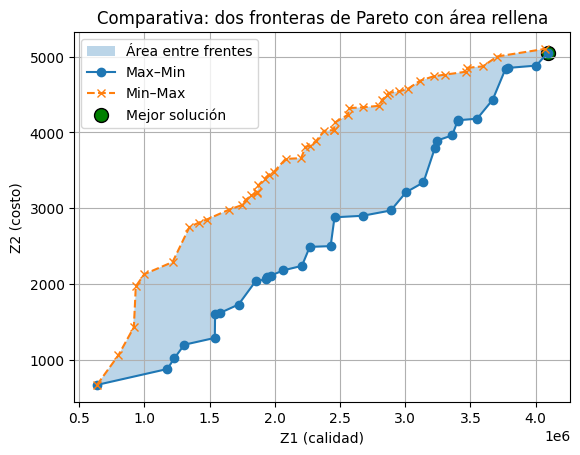

In [443]:
plt.fill_between(x_common, y_mm, y_mn, alpha=0.3, label='Área entre frentes')

# Dibujamos ambos frentes
plt.plot(mm_sorted['Z1'], mm_sorted['Z2'], marker='o', linestyle='-', label='Max–Min')
plt.plot(mn_sorted['Z1'], mn_sorted['Z2'], marker='x', linestyle='--', label='Min–Max')

# Marcamos la mejor solución en verde
plt.scatter([best_z1], [best_z2],
            color='green', s=100, edgecolors='black',
            label='Mejor solución')

plt.xlabel('Z1 (calidad)')
plt.ylabel('Z2 (costo)')
plt.title('Comparativa: dos fronteras de Pareto con área rellena')
plt.legend()
plt.grid(True)
plt.show()

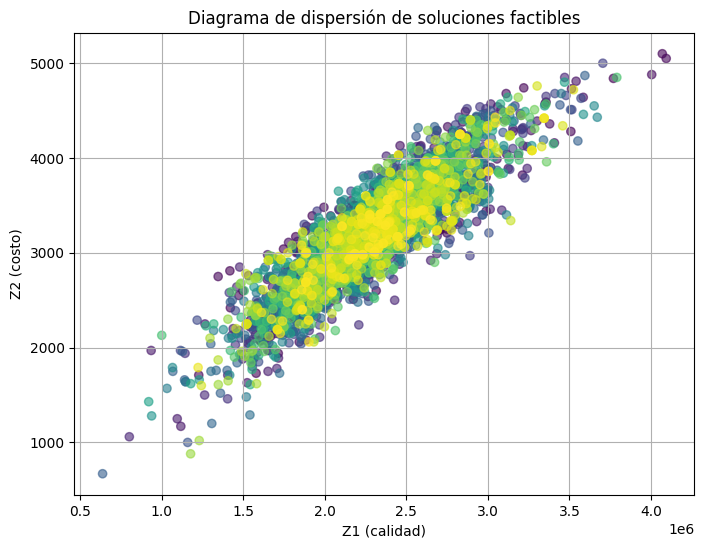

In [444]:
z1_vals = [sol[1] for sol in all_solutions]
z2_vals = [sol[2] for sol in all_solutions]

plt.figure(figsize=(8,6))
colors = np.linspace(0, 1, len(z1_vals))
plt.scatter(z1_vals, z2_vals, alpha=0.6, c=colors, cmap='viridis')
plt.xlabel('Z1 (calidad)')
plt.ylabel('Z2 (costo)')
plt.title('Diagrama de dispersión de soluciones factibles')
plt.grid(True)
plt.show()

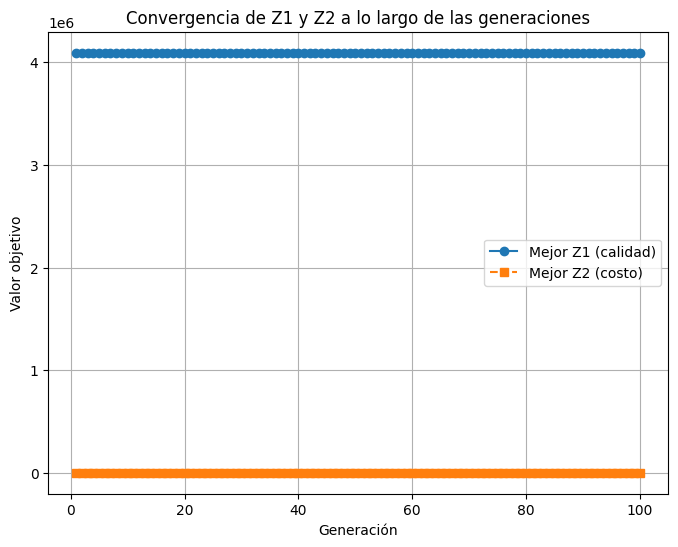

In [445]:
generations = list(range(1, T+1))

plt.figure(figsize=(8,6))
plt.plot(generations, best_z1_history, marker='o', linestyle='-',
         label='Mejor Z1 (calidad)')
plt.plot(generations, best_z2_history, marker='s', linestyle='--',
         label='Mejor Z2 (costo)')
plt.xlabel('Generación')
plt.ylabel('Valor objetivo')
plt.title('Convergencia de Z1 y Z2 a lo largo de las generaciones')
plt.legend()
plt.grid(True)
plt.show()